In [2]:
# Необходимо получить три временные матрицы для трех режимов - "разгон", "подъем", "разгон-подъём"
# Для этого необходимо провести аппроксимации некоторых других функций, помимо тех, что мы получили в предыдущий раз
# Аппроксимацию будем проводить для высот в диапазоне от 700м до 8000м

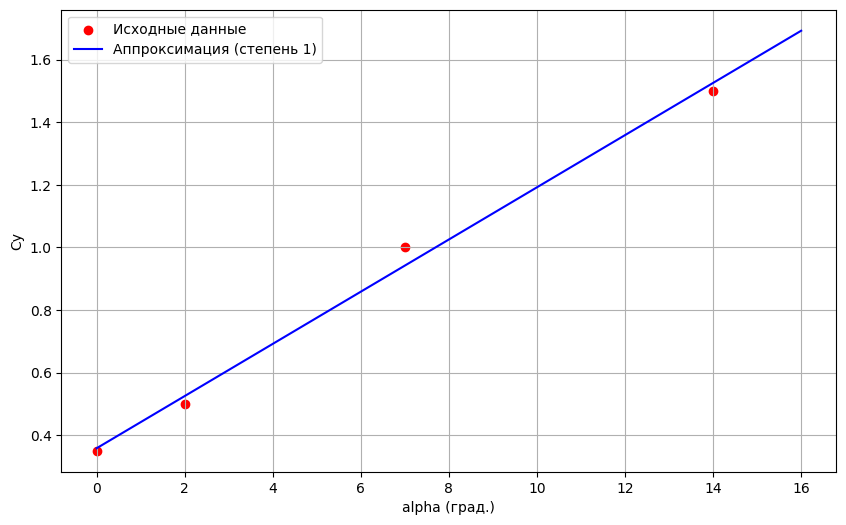

Получаем функцию: Сy(alpha) = 0.0834*alpha + 0.3579


In [3]:
# Воспользуюсь ранее реализованными функиями
import functions

import numpy as np

# Аппроксимация коэффециента подъёмной силы Cy от угла атаки alpha (возьму при delta = 20) Какое дельта брать?!

Cy = np.array([0.35, 0.5, 1, 1.5])
alpha = np.array([0, 2, 7, 14])

degree = 1  # Выбираем степень полинома

coeffs = functions.least_squares_fit(alpha, Cy, degree)

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
alpha_range = np.arange(0, 16 + 1, 1) # Интервал каждый градус
Cy_approximated = poly(alpha_range)

# Визуализация результатов
functions.plot_result(alpha, Cy, alpha_range, Cy_approximated, degree, 'alpha (град.)', 'Cy')

print(f'Получаем функцию: Сy(alpha) = {round(coeffs[0], 4)}*alpha + {round(coeffs[1], 4)}')

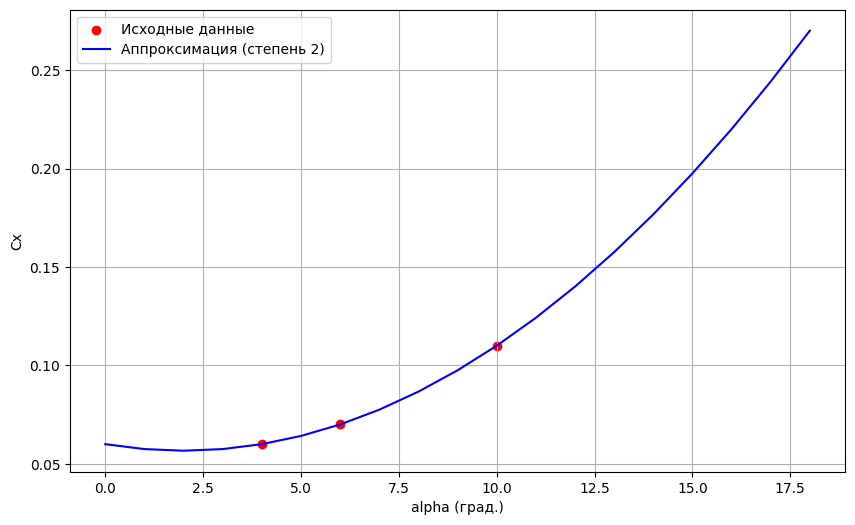

Получаем функцию: Сx(alpha) = 0.0008*alpha^2 + -0.0033*alpha + 0.06


In [4]:
# Аппроксимация коэффециента лобового сопротивления Cx от угла атаки alpha (возьму при delta = 20) Какое дельта брать?!

Cx = np.array([0.06, 0.07, 0.11])
alpha = np.array([4, 6, 10])

degree = 2  # Выбираем степень полинома

coeffs = functions.least_squares_fit(alpha, Cx,  degree)

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
alpha_range = np.arange(0, 18 + 1, 1) # Интервал каждый градус
Cx_approximated = poly(alpha_range)

# Визуализация результатов
functions.plot_result(alpha, Cx, alpha_range, Cx_approximated, degree, 'alpha (град.)', 'Cx')

print(f'Получаем функцию: Сx(alpha) = {round(coeffs[0], 4)}*alpha^2 + {round(coeffs[1], 4)}*alpha + {round(coeffs[2], 4)}')


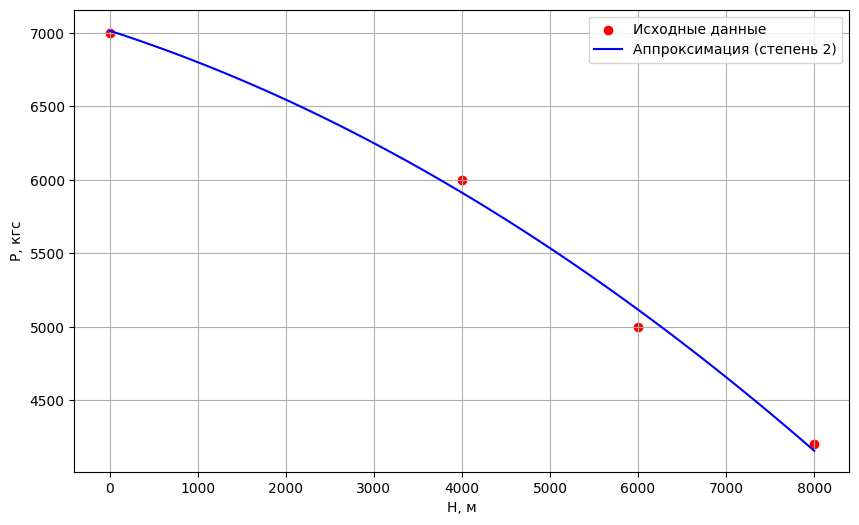

Получаем функцию: P(H) = 0*H^2 + -0.193636*H + 7014.545455


array([-2.04545455e-05, -1.93636364e-01,  7.01454545e+03])

In [5]:
# Аппроксимация тяги двигателя P от высоты полета H (при М = 0.5)

P = np.array([7000, 6000, 5000, 4200])
H = np.array([0, 4000, 6000, 8000])

degree = 2  # Выбираем степень полинома

coeffs = functions.least_squares_fit(H, P,  degree)

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
H_range = np.arange(0, 8000 + 1, 100) # Интервал каждый градус
P_approximated = poly(H_range)

# Визуализация результатов
functions.plot_result(H, P, H_range, P_approximated, degree, 'H, м', 'P, кгс')

print(f'Получаем функцию: P(H) = {round(coeffs[0])}*H^2 + {round(coeffs[1], 6)}*H + {round(coeffs[2], 6)}')
coeffs

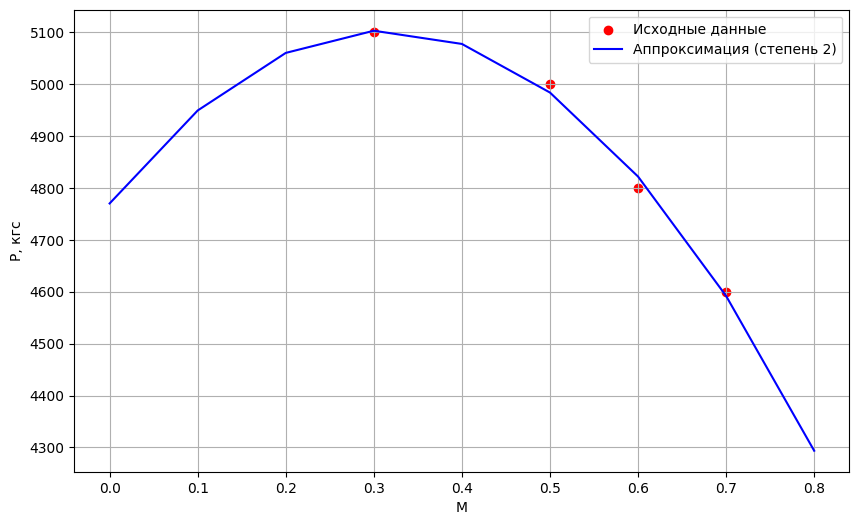

Получаем функцию: P(M) = -3409*M^2 + 2131.82*M + 4770


In [6]:
# Аппроксимация тяги двигателя P от скорости полета M (при H = 6000м)

P = np.array([5100, 5000, 4800, 4600])
M = np.array([0.3, 0.5, 0.6, 0.7])

degree = 2  # Выбираем степень полинома

coeffs = functions.least_squares_fit(M, P,  degree)

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
M_range = np.arange(0, 0.9, 0.1) # Интервал каждый градус
P_approximated = poly(M_range)

# Визуализация результатов
functions.plot_result(M, P, M_range, P_approximated, degree, 'M', 'P, кгс')

print(f'Получаем функцию: P(M) = {round(coeffs[0])}*M^2 + {round(coeffs[1], 2)}*M + {round(coeffs[2])}')

In [7]:
from math import cos, log
import approximated

# Теперь мы располагаем всеми необходимыми зависимостями
# Реализация функций расчета времени в разных режимах

def razgon(H, V1, V2, mass, S):
    """Режим разгон"""
    V = (V1 + V2) / 2
    
    ro = approximated.ro(H)
    g = approximated.g(H)
    sound_of_speed = approximated.sound_speed(H)
    M = V / sound_of_speed
    P = approximated.P_v(M)
    # Сy(alpha) = 0.0834*alpha + 0.3579
    Cya = 0.0834
    Cy0 = 0.3579
    alpha = (mass * g - P / 57.3 - Cy0 * ro * V ** 2 / 2 * S) / (P / 57.3 + Cya * ro * V ** 2 / 2 * S)
    Cx = approximated.Cx(alpha)
    return abs((mass * (V2 - V1)) / (P * cos(alpha) - Cx * V ** 2 * ro / 2 * S))


def pod(H1, H2, V, mass, S):
    """Режим подъём"""
    H = (H1 + H2) / 2
    
    ro = approximated.ro(H)
    g = approximated.g(H)
    speed_of_sound = approximated.sound_speed(H)
    M = V / speed_of_sound
    P = approximated.P_v(M)
    # Сy(alpha) = 0.0834*alpha + 0.3579
    Cya = 0.0834
    Cy0 = 0.3579
    alpha = (mass * g - P / 57.3 - Cy0 * ro * V ** 2 / 2 * S) / (P / 57.3 + Cya * ro * V ** 2 / 2 * S)
    Cx = approximated.Cx(alpha)
    X = Cx * V ** 2 * ro / 2 * S
    teta = ((P - X) * 57.3) / (mass * g)
    return abs((57.3 * (H2 - H1)) / (V * teta))


def raz_pod(H1, H2, V1, V2, mass, S):
    """Режим разгон-подъём"""
    V = (V1 + V2) / 2
    H = (H1 + H2) / 2

    ro = approximated.ro(H)
    g = approximated.g(H)
    speed_of_sound = approximated.sound_speed(H)
    M = V / speed_of_sound
    P = approximated.P_v(M)
    # Сy(alpha) = 0.0834*alpha + 0.3579
    Cya = 0.0834
    Cy0 = 0.3579
    alpha = (mass * g - P / 57.3 - Cy0 * ro * V ** 2 / 2 * S) / (P / 57.3 + Cya * ro * V ** 2 / 2 * S)
    Cx = approximated.Cx(alpha)
    
    k = (V2 - V1) / (H2 - H1)
    X = Cx * V ** 2 * ro / 2 * S
    sin_teta = (P * cos(alpha) - X) / (mass * (k * V + g))
    return abs(1 / (k * sin_teta) * log(V2 / V1))

In [11]:
# Создание и наполнение временных матриц

import pandas as pd

# Параметры ЛА
mass = 47000 # кг
S = 127 # м^2

n = 10
Vn = 350 * 1000 / 3600  # из км/ч в м/с
Vk = 880 * 1000 / 3600
Hn = 500
Hk = 8000
deltaV = (Vk - Vn) / n  # приращение скорости
deltaH = (Hk - Hn) / n  # приращение высоты

# Создаем временные матрицы Tr, Tp, Trp
Tr = np.zeros((n, n + 1))  # Матрица Tr
Tp = np.zeros((n + 1, n))  # Матрица Tp
Trp = np.zeros((n, n))  # Матрица Trp

# Заполняем матрицу Tr
for i in range(n + 1):
    Hi = Hn + i * deltaH
    for j in range(n):
        Vi = Vn + j * deltaV
        Traz = razgon(Hi - deltaH, Vi - deltaV, Vi, mass, S)
        Tr[j, i] = Traz

# Заполняем матрицу Tp
for i in range(n + 1):
    Vi = Vn + i * deltaV
    for j in range(n):
        Hi = Hn + j * deltaH
        Tpod = pod(Hi - deltaH, Hi, Vi, mass, S)
        Tp[i, j] = Tpod

# Заполняем матрицу Trp
for i in range(n):
    Vi = Vn + i * deltaV
    for j in range(n):
        Hi = Hn + j * deltaH
        Traz_pod = raz_pod(Hi - deltaH, Hi, Vi - deltaV, Vi, mass, S)
        Trp[i, j] = Traz_pod


df_Tr = pd.DataFrame(Tr)
df_Tp = pd.DataFrame(Tp)
df_Trp = pd.DataFrame(Trp)

print("Матрица Tr:")
print(df_Tr.to_string(index=False))  # Используем to_string() для вывода в виде текста
print("\nМатрица Tp:")
print(df_Tp.to_string(index=False))
print("\nМатрица Trp:")
print(df_Trp.to_string(index=False))

Матрица Tr:
       0         1         2         3         4         5         6         7         8         9         10
16.847857 18.842254 20.910465 21.694605 20.145598 17.438929 15.533788 15.291980 16.329750 16.371400 13.902549
13.392334 13.791512 14.331607 15.222440 16.678947 18.764010 20.943942 21.705807 20.033812 17.341429 15.537567
11.172677 11.974093 12.642605 13.158647 13.578803 14.046377 14.771345 15.985259 17.833272 20.073656 21.643899
 8.283771  9.161746 10.093699 11.026866 11.886997 12.602507 13.147733 13.581556 14.051157 14.756626 15.891573
 6.156417  6.817967  7.573739  8.424325  9.355137 10.327586 11.275177 12.115595 12.785843 13.286692 13.702393
 4.764558  5.245221  5.798968  6.437043  7.168817  7.997508  8.913230  9.884389 10.852316 11.738634 12.472597
 3.824009  4.187046  4.602123  5.078565  5.626712  6.256918  6.977306  7.789612  8.682871  9.626297 10.565990
 3.153869  3.440068  3.764368  4.133301  4.554478  5.036443  5.588102  6.217388  6.928686  7.718708  8.57123